In [1]:
from statsmodels.api import formula as sm

In [2]:
nr = pd.read_pickle('../data/et_cal26.pcl') # use et_cal26

In [3]:
nr.loc[nr.monthly==nr.monthly.max()]

,gw1,gw2,idx,ksat,lai,m,pa,po,rd,daily,...,nse_SF_daily,nse_SF_monthly,nse_SF_weekly,pe_ET_daily,pe_ET_monthly,pe_ET_weekly,pe_SF_daily,pe_SF_monthly,pe_SF_weekly,weekly
15559,0.451,1.015,15559,526.22,0.52,8.534,1.229,3.009,7.441,0.734049,...,0.812628,0.787539,0.799053,0.579589,0.271869,0.305515,1.465803,1.55134,1.554123,0.793223


In [4]:
data = rut.readRHESSysBasin('/RHESSys/ComoCreek_new/out/et_cal26/et_cal26_15559_basin.daily')

In [5]:
data = data.loc[data.wateryear<=2013].copy()

In [6]:
data.columns

Index([u'basinID', u'pot_surface_infil', u'snow_thr', u'sat_def_z', u'sat_def',
       u'rz_storage', u'unsat_stor', u'rz_drainage', u'unsat_drain', u'cap',
       u'evap', u'snowpack', u'trans', u'baseflow', u'return', u'streamflow',
       u'psn', u'lai', u'gw.Qout', u'gw.storage', u'detention_store',
       u'%sat_area', u'litter_store', u'canopy_store', u'%snow_cover',
       u'snow_subl', u'trans_var', u'acc_trans', u'acctransv_var', u'pet',
       u'dC13', u'precip', u'pcp_assim', u'mortf', u'tmax', u'tmin', u'tavg',
       u'vpd', u'snowfall', u'recharge', u'gpsn', u'resp', u'gs', u'rootdepth',
       u'plantc', u'snowmelt', u'canopysubl', u'routedstreamflow',
       u'canopy_snow', u'height', u'evap_can', u'evap_lit', u'evap_soil',
       u'litrc', u'Kdown', u'Ldown', u'Kup', u'Lup', u'Kstar_can',
       u'Kstar_soil', u'Kstar_snow', u'Lstar_can', u'Lstar_soil',
       u'Lstar_snow', u'LE_canopy', u'LE_soil', u'LE_snow', u'Lstar_strat',
       u'canopydrip', u'ga', u'wateryear'

In [7]:
out = pd.DataFrame({'P':data.groupby(by='wateryear').sum()['precip']})
out['ET'] = data.groupby('wateryear').sum()['ET']
out['Q'] = data.groupby('wateryear').sum()['streamflow']
out['Q_P'] = out.Q/out.P
out['Q_P2'] = 1-(out.ET/out.P)
out['SMR'] = np.NaN

In [8]:
for wy in data.wateryear.unique():
    SM = data.loc[data.wateryear == wy,'snowmelt'].as_matrix()
    
    smr = np.mean(SM[SM!=0])
    
    out.loc[out.index==wy,'SMR'] = smr

In [9]:
out

,P,ET,Q,Q_P,Q_P2,SMR
wateryear,,,,,,
2005,856.376712,958.575463,302.195533,0.352877,-0.119339,10.678584
2006,736.432906,1002.100707,239.341982,0.325002,-0.360749,7.331502
2007,933.360082,848.466152,328.876832,0.352358,0.090955,9.994736
2008,795.518811,564.864007,252.675932,0.317624,0.289943,9.092121
2009,715.602518,510.141367,232.014006,0.324222,0.287116,9.078901
2010,727.058202,506.409933,240.528853,0.330825,0.303481,10.590964
2011,940.063272,579.373409,317.897707,0.338166,0.383687,10.804345
2012,772.055313,514.498039,253.465035,0.328299,0.333600,7.707203
2013,1093.452589,573.131874,376.996895,0.344777,0.475851,10.872126


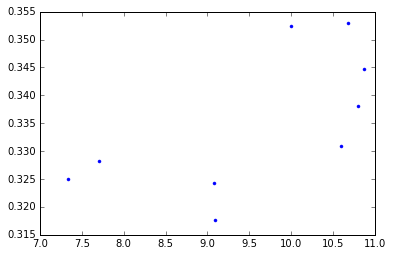

In [10]:
plt.plot(out.SMR,out.Q_P,'.')

In [13]:
print sm.ols('Q_P ~ SMR + 1',out).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                    Q_P   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     4.776
Date:                Mon, 07 Nov 2016   Prob (F-statistic):             0.0651
Time:                        07:30:22   Log-Likelihood:                 29.338
No. Observations:                   9   AIC:                            -54.68
Df Residuals:                       7   BIC:                            -54.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2773      0.027     10.422      0.0